In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

# Gathering Data

#### 1.The WeRateDogs Twitter archive 

In [2]:
# upload the file into Jupter notebook, then read the file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 2.The image predictions

In [6]:
# download programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [7]:
# Read the tsv file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Each tweet's retweet count and other additional data

In [8]:
# query the Twitter API for each tweet's JSON data using Python's Tweepy library 
consumer_key = 'Ad0VGCZoW6Tzf7UzmtJUQU6jR'
consumer_secret = '4M8ACfCaRU17V6XqRaUHjnZGeXfB0mGcamveDsyX2apRa8r1zB'
access_token = '1623315782-HM3pUHNi2BKjra1sY76M7OFPxTM53ieBU7KAaMd'
access_secret = 'GTELieAwaEIKOrlRNmJO99Kh1bcGYZSnfGXMvTmNbIi3J'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [9]:
#Download Tweepy status object based on tweet_id 
list_of_tweets = []
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 738
Rate limit reached. Sleeping for: 739


In [12]:
# to see how many tweet ids are found in the api
len(list_of_tweets)

2332

In [13]:
# # to see how many tweet ids are not found in the api
len(cant_find_tweets_for_those_ids)

24

In [14]:
# get the json part of each tweepy status object and add them all into lists
lists = []
for each_json_tweet in list_of_tweets:
    lists.append(each_json_tweet)

In [15]:
# store each tweet's entire set of JSON data in tweet_json.txt file.

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(lists, indent=4))

In [16]:
# get information and create a dataframe
list_second = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    data_injsonfile = json.load(json_file)
    for dic_1 in data_injsonfile:
        tweet_id = dic_1['id']
        favorite_count = dic_1['favorite_count']
        retweet_count = dic_1['retweet_count']
        followers_count = dic_1['user']['followers_count']
        friends_count = dic_1['user']['friends_count']
        
        list_second.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             })
        tweet_json = pd.DataFrame(list_second, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count'])

In [17]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
0,892420643555336193,36054,7675,8779998,16
1,892177421306343426,31097,5676,8779998,16
2,891815181378084864,23411,3763,8779998,16
3,891689557279858688,39325,7851,8779998,16
4,891327558926688256,37565,8446,8779998,16


In [18]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 5 columns):
tweet_id           2332 non-null object
favorite_count     2332 non-null int64
retweet_count      2332 non-null int64
followers_count    2332 non-null int64
friends_count      2332 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


## Assessing data

### 1.Visual assessment

In [20]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [21]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
0,892420643555336193,36054,7675,8779998,16
1,892177421306343426,31097,5676,8779998,16
2,891815181378084864,23411,3763,8779998,16
3,891689557279858688,39325,7851,8779998,16
4,891327558926688256,37565,8446,8779998,16
5,891087950875897856,18930,2833,8779998,16
6,890971913173991426,11004,1844,8779998,16
7,890729181411237888,60742,17130,8779998,16
8,890609185150312448,26046,3900,8779998,16
9,890240255349198849,29773,6658,8779998,16


### 2.Programmatic assessment

In [23]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
# To see if there are any duplicated ids
sum(twitter_archive['tweet_id'].duplicated())

0

In [25]:
# to see the values of column rating_numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
# to see the values of column rating_denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [29]:
sum(image_prediction.jpg_url.duplicated())

66

In [30]:

image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [31]:
image_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [32]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [33]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 5 columns):
tweet_id           2332 non-null object
favorite_count     2332 non-null int64
retweet_count      2332 non-null int64
followers_count    2332 non-null int64
friends_count      2332 non-null int64
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


In [34]:
tweet_json.sample(20)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count
2268,667160273090932737,247,60,8780062,16
430,819015337530290176,0,37279,8780000,16
1869,674752233200820224,1418,448,8780064,16
1265,708349470027751425,2318,730,8780033,16
1373,699788877217865730,2212,506,8780034,16
2123,669753178989142016,774,377,8780062,16
558,800859414831898624,696,98,8779999,16
1986,672248013293752320,1668,572,8780063,16
2010,671743150407421952,722,227,8780063,16
1339,703041949650034688,26126,12388,8780034,16


### Quality issues

1.Missing data

There are 2356 rows in twitter_archive table. From coding (twitter_archive.info()), we know column like "expanded_urls" only has 2297 non-null values.

2.Data validity issue

In twitter_archive table,the last few rows show some dog names are 'None', 'a', or 'an.'
These are obviously wrong.

3.Data accuracy issue

In twitter_archive table, timestamp is an object and retweeted_status_timestamp is also an object (the other retweeted statuses are floats).

4.Data consistency issue

There are some strange outliers in columns. From coding(twitter_archive.rating_denominator.value_counts()),there are 23 rating_denominators that are not equal to 10. Similarly, there are rating_numerators that are even bigger than 100.

5.Erroneous data

pupper, puppo, floofer and doggo column: There are some IDs with more than one dog stage information (two dog stages are rated).

6.Duplicated values

From coding (sum(image_prediction.jpg_url.duplicated())),we know there are some duplicated values in this column.

7.Data types are not consistent

In tweet_json table, tweet_id is object type. This is not consistent with data type in other 2 tables(int64 data type),which is not suitable for further data analysis.

8.Table size do not match

There are 2356 rows in twitter_archive, while 2075 rows in images_prediction.The size of the table do not match.



### Tidiness Issues

1 Columns issue.

Each variable forms a column. In twitter_archive table,the last four columns all relate to the stage of dogs (dogoo, floofer, pupper, puppo).

2 Untidy data.

In twitter_archive table, column source data have <a and /a> tag in HTML format surrounding the text.These are not common internet address for ordinary users.

3 Uppercase and lowercase mixture

In images prediction table, there is no consistency in p1, p2 and p3 columns. Sometimes the dog breed predictios are lowercase, sometimes they are uppercase.

4 Image_prediction table.

Tidiness require each type of observational unit forms a table.Tweet_archive and tweet_json can be merged into one table because they have same tweet_id column. 

5 Many tables VS one table

Tidiness requires each type of observational unit forms a table. These three tables can be merged into one table to make data tidy.


# Cleaning Data

In [35]:
# Copy the datasets before cleaning 
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### 1. Delete retweets

The below information shows there are repeated 158(156+2) values in retweeted_status_user_id.

In [36]:
twitter_archive_clean.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [37]:
#Delete retweets by filtering retweeted_status_user_id
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]


In [38]:
# check after deleting
twitter_archive_clean.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

### 2. Clean untidy column source

In [39]:
import re
twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [40]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 3. Delete columns that are no needed

In [41]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], axis = 1)

In [42]:
# check the new table after deleting
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


### 4. Melt columns 

In [43]:
# Extract the dog stage from the column text into the colunn
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [44]:
twitter_archive_clean.head(30)

,tweet_id,in_reply_to_status_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,NaN
5,891087950875897856,NaN,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None,NaN
6,890971913173991426,NaN,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None,NaN
7,890729181411237888,NaN,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,None,None,None,None,NaN
8,890609185150312448,NaN,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None,NaN
9,890240255349198849,NaN,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None,doggo


In [45]:
#check the column after changing
twitter_archive_clean.dog_stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

In [46]:
# drop the 4 original columns 
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','puppo','pupper'],axis=1) 

In [48]:
# check after correction
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN


### 5. Adjust  timestamp data

In [49]:
#convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [50]:
#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day


In [51]:
#drop the original timestamp column
twitter_archive_clean = twitter_archive_clean.drop(['timestamp'],axis = 1)

In [52]:
# check twitter_archive after cleaning
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,day
0,892420643555336193,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,2017,8,1
1,892177421306343426,NaN,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,2017,8,1


### 6. Correct dog name

In [53]:
twitter_archive_clean.name.value_counts()

None          680
a              55
Charlie        11
Lucy           11
Cooper         10
Oliver         10
Tucker          9
Penny           9
Winston         8
Sadie           8
the             8
Lola            8
Daisy           7
Toby            7
Bo              6
Bailey          6
Stanley         6
Bella           6
Koda            6
an              6
Jax             6
Oscar           6
Scout           5
Bentley         5
Milo            5
Rusty           5
Leo             5
Dave            5
Buddy           5
Chester         5
             ... 
Nollie          1
Hero            1
Duddles         1
Griswold        1
Suki            1
Dylan           1
Meatball        1
Sundance        1
Oddie           1
Stu             1
Aldrick         1
by              1
Pherb           1
Jameson         1
Herb            1
Perry           1
O               1
Scruffers       1
Brian           1
Tess            1
Bronte          1
Howie           1
Ruffles         1
Brandonald      1
Godi      

Replace "a" and "an" with "None" in column name

In [54]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('a', 'None')

In [55]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('an', 'None')

In [56]:
# check table after replacement
twitter_archive_clean.loc[twitter_archive_clean.name == 'an']

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,day


In [57]:
# check table after replacement
twitter_archive_clean.loc[twitter_archive_clean.name == 'a']

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,day


### 7. Correct rating data

In [59]:
# Change the data type to facilitate further analysis
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

In [60]:
twitter_archive_clean.rating_numerator.value_counts()

12.0      500
10.0      442
11.0      426
13.0      307
9.0       156
8.0        98
7.0        54
14.0       43
5.0        36
6.0        32
3.0        19
4.0        17
2.0         9
1.0         8
0.0         2
420.0       2
84.0        1
24.0        1
27.0        1
15.0        1
17.0        1
960.0       1
143.0       1
99.0        1
666.0       1
121.0       1
182.0       1
165.0       1
45.0        1
75.0        1
204.0       1
1776.0      1
80.0        1
88.0        1
144.0       1
26.0        1
20.0        1
44.0        1
60.0        1
50.0        1
Name: rating_numerator, dtype: int64

In [61]:
# check the texts of some outliers to see if the numbers are right or not
twitter_archive_clean.query("rating_numerator < 5").loc[:,['text','rating_numerator']]

,text,rating_numerator
315,When you're so blinded by your systematic plag...,0.0
765,This is Wesley. He's clearly trespassing. Seem...,3.0
883,This is Fido. He can tell the weather. Not goo...,4.0
912,Here's another picture without a dog in it. Id...,4.0
1004,Viewer discretion is advised. This is a terrib...,4.0
1016,"PUPDATE: can't see any. Even if I could, I cou...",0.0
1165,Happy 4/20 from the squad! 13/10 for all https...,4.0
1189,This is Alexanderson. He's got a weird ass bir...,3.0
1219,This is Benedict. He's a feisty pup. Needs a b...,4.0
1249,What hooligan sent in pictures w/out a dog in ...,3.0


In [73]:
# The visual window is too small to show all sentences
# I opened the table in Excel to see the complete texts
twitter_archive_clean.loc[(1165,1459,2335),['text','rating_numerator']]

,text,rating_numerator
1165,Happy 4/20 from the squad! 13/10 for all https...,4.0
1459,This may be the greatest video I've ever been ...,4.0
2335,This is an Albanian 3 1/2 legged Episcopalian...,1.0


In [62]:
# The texts shows these rating_numerator are not right and should be corrected 
twitter_archive_clean.loc[2335,'rating_numerator'] = 9
twitter_archive_clean.loc[(1165,1459),'rating_numerator'] = 13

In [64]:
# check after correction
twitter_archive_clean.loc[(1165,1459,2335),['text','rating_numerator']]

,text,rating_numerator
1165,Happy 4/20 from the squad! 13/10 for all https...,13.0
1459,This may be the greatest video I've ever been ...,13.0
2335,This is an Albanian 3 1/2 legged Episcopalian...,9.0


In [65]:
# Then we check the rating_denominators
twitter_archive_clean.rating_denominator.value_counts()

10.0     2153
50.0        3
11.0        2
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64

In [66]:
# Usually, rating_denominators are 10,
# assessing the texts when rating_denominator are not 10

twitter_archive_clean.query("rating_denominator != 10").loc[:,['tweet_id','text','rating_denominator']]

,tweet_id,text,rating_denominator
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,0.0
342,832088576586297345,@docmisterio account started on 11/15/15,15.0
433,820690176645140481,The floofs have been released I repeat the flo...,70.0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,7.0
902,758467244762497024,Why does this never happen at my front door......,150.0
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",11.0
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,90.0


In [67]:
# After checking the full texts in Excel
# Replace some of them with 10 if the texts show the suitable meaning
twitter_archive_clean.rating_denominator[twitter_archive_clean.tweet_id == 740373189193256964] = 10
twitter_archive_clean.rating_denominator[twitter_archive_clean.tweet_id == 722974582966214656] = 10
twitter_archive_clean.rating_denominator[twitter_archive_clean.tweet_id == 716439118184652801] = 10
twitter_archive_clean.rating_denominator[twitter_archive_clean.tweet_id == 682962037429899265] = 10
twitter_archive_clean.rating_denominator[twitter_archive_clean.tweet_id == 666287406224695296] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages

In [69]:
# check after replacement
twitter_archive_clean.loc[[1068, 1165,1202,1662,2335]]

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,day
1068,740373189193256964,NaN,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",9.0,10.0,None,NaN,2016,6,8
1165,722974582966214656,NaN,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,13.0,10.0,None,NaN,2016,4,21
1202,716439118184652801,NaN,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,50.0,10.0,Bluebert,NaN,2016,4,3
1662,682962037429899265,NaN,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,7.0,10.0,DNonerrel,NaN,2016,1,1
2335,666287406224695296,NaN,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,9.0,10.0,Nonen,NaN,2015,11,16


In [71]:
# Since there are still som rating_denominators are not 10
# I can not compare rating_numerators directly
#Create a new column with rating in float type to compare dogs' rating scores
twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)

twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,day,rating
0,892420643555336193,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,PhineNones,NaN,2017,8,1,13.0
1,892177421306343426,NaN,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,2017,8,1,13.0
2,891815181378084864,NaN,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,2017,7,31,12.0
3,891689557279858688,NaN,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,DNonerlNone,NaN,2017,7,30,13.0
4,891327558926688256,NaN,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,FrNonenklin,NaN,2017,7,29,12.0


### 8. Delete duplicated jpg_urls

In [72]:
#Delete 66 duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [73]:
# Check after deletilng
sum(image_prediction_clean['jpg_url'].duplicated())

0

In [75]:
#Check the table
image_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 8. Change tweet_id data type

In [76]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(int)

In [77]:
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

### 9.  Dog breeds prediction

In [85]:
# I get the dog breed prediction data from p1, p2 or p3

dog_breed = []

def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_breed.append(image_prediction_clean['p1'])
        
    elif image_prediction_clean['p2_dog'] == True:
        dog_breed.append(image_prediction_clean['p2'])
       
    elif image_prediction_clean['p3_dog'] == True:
        dog_breed.append(image_prediction_clean['p3'])
       
    else:
        dog_breed.append('False')
        

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

image_prediction_clean['dog_breed'] = dog_breed

In [86]:
#drop rows that has false prediction
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_breed'] != 'False']

image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 13 columns):
tweet_id     1691 non-null int64
jpg_url      1691 non-null object
img_num      1691 non-null int64
p1           1691 non-null object
p1_conf      1691 non-null float64
p1_dog       1691 non-null bool
p2           1691 non-null object
p2_conf      1691 non-null float64
p2_dog       1691 non-null bool
p3           1691 non-null object
p3_conf      1691 non-null float64
p3_dog       1691 non-null bool
dog_breed    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 150.3+ KB


### 10.  Merge these into one dataframe

In [87]:
#Firstly, merge twitter_archive_clean and image_prediction_clean
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1 to 2174
Data columns (total 24 columns):
tweet_id                 1626 non-null int64
in_reply_to_status_id    20 non-null float64
source                   1626 non-null object
text                     1626 non-null object
rating_numerator         1626 non-null float64
rating_denominator       1626 non-null float64
name                     1626 non-null object
dog_stage                266 non-null object
year                     1626 non-null int64
month                    1626 non-null int64
day                      1626 non-null int64
rating                   1626 non-null float64
jpg_url                  1626 non-null object
img_num                  1626 non-null float64
p1                       1626 non-null object
p1_conf                  1626 non-null float64
p1_dog                   1626 non-null object
p2                       1626 non-null object
p2_conf                  1626 non-null float64
p2_dog             

In [88]:
#Secondly, merge df_twitter1 and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 28 columns):
tweet_id                 1626 non-null int64
in_reply_to_status_id    20 non-null float64
source                   1626 non-null object
text                     1626 non-null object
rating_numerator         1626 non-null float64
rating_denominator       1626 non-null float64
name                     1626 non-null object
dog_stage                266 non-null object
year                     1626 non-null int64
month                    1626 non-null int64
day                      1626 non-null int64
rating                   1626 non-null float64
jpg_url                  1626 non-null object
img_num                  1626 non-null float64
p1                       1626 non-null object
p1_conf                  1626 non-null float64
p1_dog                   1626 non-null object
p2                       1626 non-null object
p2_conf                  1626 non-null float64
p2_dog             

## Storing, Analyzing, and Visualizing Data

In [89]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [90]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,favorite_count,retweet_count,followers_count,friends_count
0,892177421306343426,NaN,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,2017,8,...,0.090647,True,papillon,0.068957,True,Chihuahua,31097.0,5676.0,8779998.0,16.0
1,891815181378084864,NaN,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,2017,7,...,0.078253,True,kelpie,0.031379,True,Chihuahua,23411.0,3763.0,8779998.0,16.0
2,891689557279858688,NaN,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,DNonerlNone,NaN,2017,7,...,0.168086,True,spatula,0.040836,False,Labrador_retriever,39325.0,7851.0,8779998.0,16.0
3,891327558926688256,NaN,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,FrNonenklin,NaN,2017,7,...,0.225770,True,German_short-haired_pointer,0.175219,True,basset,37565.0,8446.0,8779998.0,16.0
4,891087950875897856,NaN,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,NaN,2017,7,...,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,18930.0,2833.0,8779998.0,16.0


### 1.The most common dog breed

In [91]:
df_twitter['dog_breed'].value_counts()

golden_retriever                  143
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Shih-Tzu                           20
Staffordshire_bullterrier          20
Siberian_husky                     20
beagle                             19
Cardigan                           19
Shetland_sheepdog                  19
Maltese_dog                        19
Rottweiler                         19
kuvasz                             18
basset                             17
Italian_grey

Text(0.5,1,'The Most common Dog Breed')

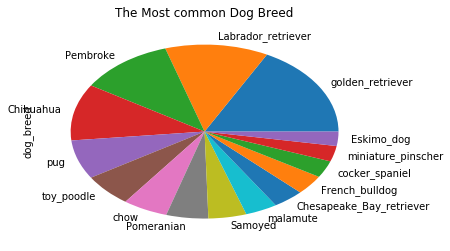

In [92]:
# Visulation of the most common dog breed
# We choose the first 15 dog breeds and drppping other unimportant dog types
df_twitter['dog_breed'].value_counts()[0:15].plot(kind = 'pie')
plt.title('The Most common Dog Breed')

Obviously, golden_retriever is the most common dog type. The second type is labrador retriever. The third is pembroke. The forth is chihuahua.

### 2. The highest rating dog breed

In [93]:
df_dog_breed_mean = df_twitter.groupby('dog_breed').mean()

In [94]:
df_dog_breed_mean.head(10)

,tweet_id,in_reply_to_status_id,rating_numerator,rating_denominator,year,month,day,rating,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,followers_count,friends_count
dog_breed,,,,,,,,,,,,,,,,
Afghan_hound,8.095999e+17,NaN,8.000000,10.0,2016.500000,6.000000,16.000000,8.000000,1.000000,0.513621,0.077449,0.067637,11064.500000,3129.000000,8.780000e+06,16.0
Airedale,7.184489e+17,NaN,9.833333,10.0,2015.583333,8.750000,15.916667,9.833333,1.166667,0.583771,0.129887,0.083516,4805.000000,1220.833333,8.780035e+06,16.0
American_Staffordshire_terrier,7.597284e+17,NaN,10.312500,10.0,2016.187500,5.250000,15.000000,10.312500,1.187500,0.641898,0.146242,0.052138,7692.800000,1801.600000,8.780022e+06,16.0
Appenzeller,7.939334e+17,NaN,11.000000,10.0,2016.500000,4.500000,18.500000,11.000000,1.000000,0.503665,0.152041,0.130708,6667.500000,1259.000000,8.780016e+06,16.0
Australian_terrier,7.785921e+17,NaN,11.500000,10.0,2016.500000,3.500000,7.000000,11.500000,2.000000,0.307584,0.242234,0.115970,10154.000000,2726.500000,8.780016e+06,16.0
Bedlington_terrier,7.843395e+17,NaN,10.333333,10.0,2016.333333,6.000000,7.333333,10.333333,1.000000,0.438402,0.140861,0.091291,22905.166667,7283.666667,8.780016e+06,16.0
Bernese_mountain_dog,7.570201e+17,NaN,11.272727,10.0,2016.090909,6.090909,17.727273,11.272727,1.181818,0.767392,0.139979,0.033447,6652.727273,1413.000000,8.780020e+06,16.0
Blenheim_spaniel,7.404407e+17,NaN,11.100000,10.0,2015.800000,8.200000,13.900000,11.100000,1.400000,0.699588,0.093572,0.043319,8443.400000,2255.700000,8.780028e+06,16.0
Border_collie,7.457945e+17,NaN,10.583333,10.0,2016.083333,5.250000,14.666667,10.583333,1.416667,0.576845,0.190686,0.077855,8170.500000,1947.166667,8.780027e+06,16.0


In [95]:
df_dog_breed_sorted = df_dog_breed_mean['rating'].sort_values()

df_dog_breed_sorted

dog_breed
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.272727
Boston_bull                     9.416667
Saint_Bernard                   9.500000
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
Norwich_terrier                 9.600000
miniature_schnauzer             9.600000
redbone                         9.666667
English_setter                  9.714286
Maltese_dog                     9.736842
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Irish_terrier                   9.800000
Airedale                        9.833333
papillon                        9.833333
Newfoundland                    9.857143
Mexican_hairless                9.857143
miniature_poodle                9.875000
miniat

In [96]:
# choosing the rating higher than 11.5 in order to simplify the visulation 
df_highratings = df_dog_breed_mean[df_dog_breed_mean.rating >= 11.5]


Text(0.5,1,'The Highest Rating Dog Breed')

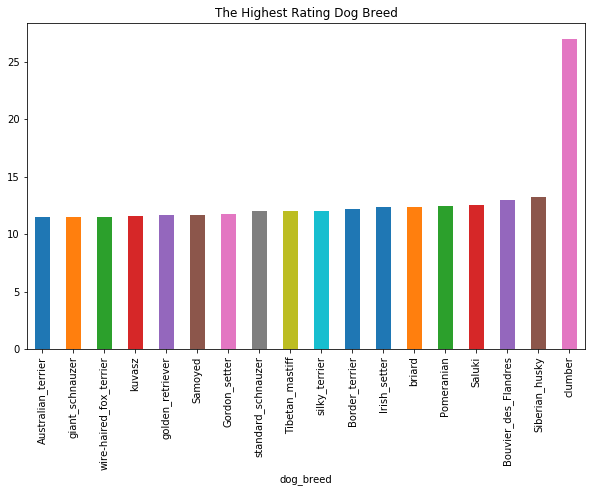

In [97]:
df_highratings['rating'].sort_values().plot(kind = "bar", figsize = (10,6))
plt.title("The Highest Rating Dog Breed")

In [100]:
# The clumber dog breed has the highest ratilng
# check this extreme value
df_twitter.loc[df_twitter.dog_breed == "clumber"]

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,favorite_count,retweet_count,followers_count,friends_count
469,778027034220126208,NaN,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0,Sophie,NaN,2016,9,...,0.01595,True,Lhasa,0.006519,True,clumber,6613.0,1634.0,8780000.0,16.0


In [103]:
# Drop this outlier row
df_twitter = df_twitter.drop(df_twitter[df_twitter.dog_breed == "clumber"].index)

In [104]:
# check after deleting
df_twitter.loc[df_twitter.dog_breed == "clumber"]

,tweet_id,in_reply_to_status_id,source,text,rating_numerator,rating_denominator,name,dog_stage,year,month,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,favorite_count,retweet_count,followers_count,friends_count


In [106]:
df_dog_breed_mean = df_twitter.groupby('dog_breed').mean()

In [107]:
df_dog_breed_sorted = df_dog_breed_mean['rating'].sort_values()

df_dog_breed_sorted

dog_breed
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.800000
Walker_hound                    9.000000
Scotch_terrier                  9.000000
Tibetan_terrier                 9.250000
dalmatian                       9.272727
Boston_bull                     9.416667
Saint_Bernard                   9.500000
Welsh_springer_spaniel          9.500000
Dandie_Dinmont                  9.571429
Norwich_terrier                 9.600000
miniature_schnauzer             9.600000
redbone                         9.666667
English_setter                  9.714286
Maltese_dog                     9.736842
Rhodesian_ridgeback             9.750000
Scottish_deerhound              9.750000
Irish_terrier                   9.800000
Airedale                        9.833333
papillon                        9.833333
Newfoundland                    9.857143
Mexican_hairless                9.857143
miniature_poodle                9.875000
miniat

In [108]:
df_highratings = df_dog_breed_mean[df_dog_breed_mean.rating >= 11.5]


Text(0.5,1,'The Highest Rating Dog Breed')

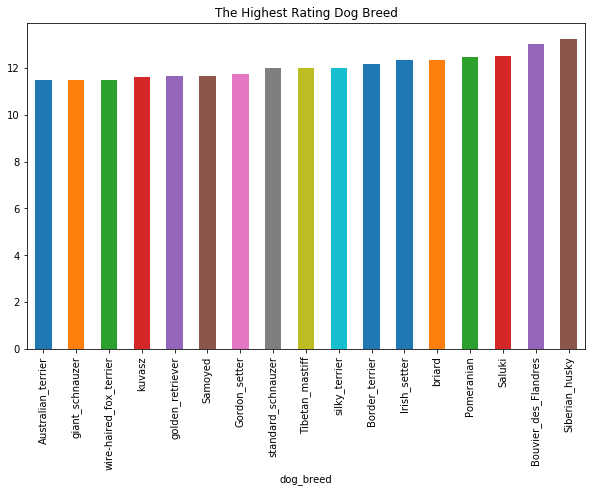

In [109]:
df_highratings['rating'].sort_values().plot(kind = "bar", figsize = (10,6))
plt.title("The Highest Rating Dog Breed")

#### Siberian_husky and Bouvier_des_Flandres receive the highest and second  raings(13.25, 13.0) 
#### Japanese_spaniel receives the lowest ratings(5.0).

### 3. The most favorite dog breed

In [110]:
df_favorite_sorted = df_dog_breed_mean['favorite_count'].sort_values()

df_favorite_sorted

dog_breed
Brabancon_griffon                802.333333
groenendael                     1049.500000
Japanese_spaniel                1214.000000
Irish_wolfhound                 1388.000000
Tibetan_terrier                 1671.500000
standard_schnauzer              1834.000000
Scottish_deerhound              2071.750000
basenji                         2263.888889
Lhasa                           2406.200000
EntleBucher                     2432.000000
papillon                        2635.500000
Maltese_dog                     2669.210526
Saint_Bernard                   2787.666667
toy_terrier                     2892.333333
redbone                         2968.833333
English_setter                  2975.571429
soft-coated_wheaten_terrier     3020.333333
miniature_schnauzer             3108.200000
miniature_poodle                3136.000000
Dandie_Dinmont                  3149.285714
Scotch_terrier                  3244.000000
Shih-Tzu                        3252.800000
Ibizan_hound          

In [112]:
# choosing the favorite counts higher than 10000 in order to simplify the visulation 
df_highfavorite = df_dog_breed_mean[df_dog_breed_mean.favorite_count >= 10000]

Text(0.5,1,'The Most Favorite Dog Breed')

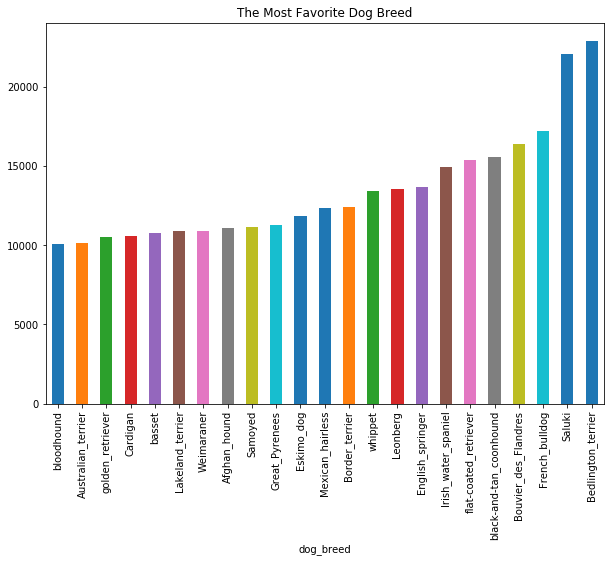

In [113]:
df_highfavorite['favorite_count'].sort_values().plot(kind = "bar", figsize = (10,7))
plt.title("The Most Favorite Dog Breed")

#### Bedlington_terrier gets the most favorite counts(22922), which is different with the highest rated dog type(Siberian_husky)
#### Brabancon_griffon gets the least favorite counts(803), which is not the lowest rated dog type(Japanese_spaniel).

### 4. The relationship between ratings and retweets


Text(0,0.5,'Ratings')

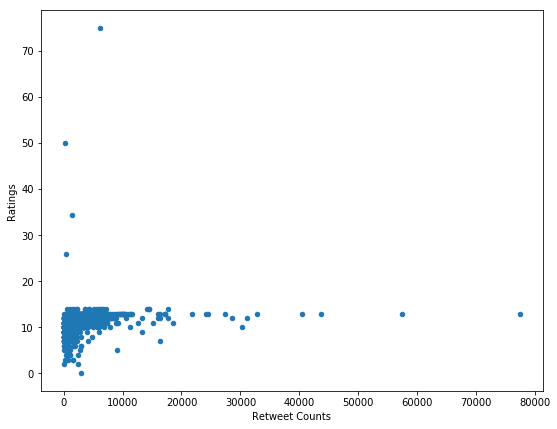

In [114]:
df_twitter.plot(x='retweet_count', y='rating', kind='scatter', figsize = (9,7))
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')


#### The highest ratings do not necessarily receive the most retweets.

### 5. The most common dog names

In [115]:
df_twitter.name.value_counts()

None           450
Lucy            10
Cooper          10
ChNonerlie      10
Oliver           9
Tucker           8
Winston          7
the              7
SNonedie         7
Penny            7
DNoneisy         7
KodNone          6
JNonex           6
Toby             6
LolNone          5
Leo              5
OscNoner         5
StNonenley       5
BellNone         5
Rusty            4
CNonessie        4
Duke             4
Chester          4
MNoneggie        4
ONonekley        4
Reggie           4
Finn             4
BNoneiley        4
Bentley          4
Brody            4
              ... 
Bobb             1
Corey            1
Ed               1
Shelby           1
Aubie            1
SpNonerk         1
Longfellow       1
Howie            1
Koko             1
Tyrus            1
BrNonendy        1
Zeek             1
DNonerlNone      1
Brutus           1
Sid              1
Vinnie           1
Miguel           1
Eve              1
MNoneck          1
LilNoneh         1
Bronte           1
MNonec      

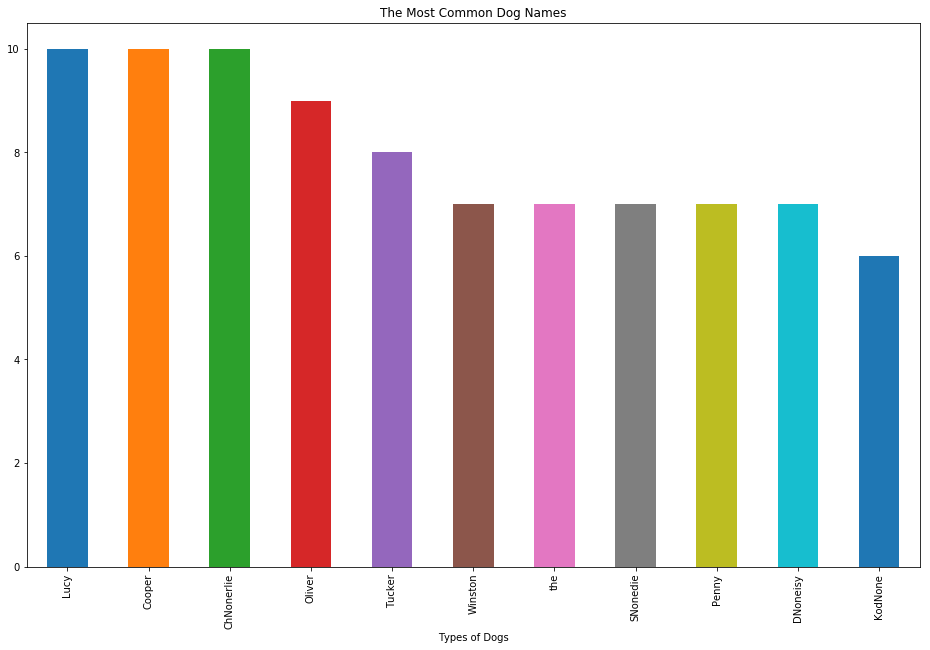

In [117]:
# None is not right dog names, we get the picture after dropping these the value.

df_twitter.name.value_counts()[1:12].plot('bar', figsize=(16,10), title='The Most Common Dog Names').set_xlabel("Types of Dogs");

#### The most popular dog namess areLucy, Cooper and ChNonerlie(all are 10), then are Oliver(9) and Tucker(8).

### 6. The relationship between favorite count and retweet count

Text(0.5,1,'Retweets and Likes Scatter Plot')

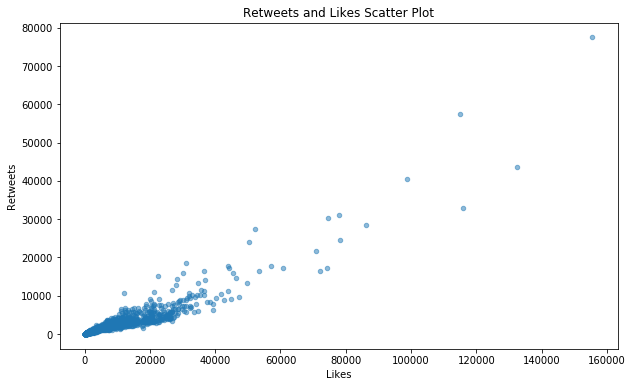

In [172]:
df_twitter.plot(kind='scatter',x='favorite_count',y='retweet_count', figsize = (10,6),alpha = 0.5)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')

### 7. The best month to get tweet favorites

In [135]:
df_favorite_mean = df_twitter.groupby('month').favorite_count.mean()

In [136]:
df_favorite_mean

month
1      6867.295337
2      8249.157895
3      8051.795918
4     11100.265060
5     14283.358025
6     16468.858491
7     14839.454545
8      8512.886364
9      9286.270833
10    10947.360000
11     2586.463878
12     4430.981873
Name: favorite_count, dtype: float64

In [138]:
df_favorite = df_twitter.groupby('month').mean()

In [140]:
df_favorite

,tweet_id,in_reply_to_status_id,rating_numerator,rating_denominator,year,day,rating,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,followers_count,friends_count
month,,,,,,,,,,,,,,,
1,7.251455e+17,6.869153e+17,12.518135,11.450777,2016.279793,15.295337,10.891192,1.212435,0.590092,0.134662,0.063178,6867.295337,2133.093264,8.780039e+06,16.0
2,7.487479e+17,6.830199e+17,11.625000,10.460526,2016.375000,14.559211,11.092105,1.309211,0.571253,0.137160,0.067418,8249.157895,2096.559211,8.780025e+06,16.0
3,7.486066e+17,7.098359e+17,12.449664,11.275168,2016.295302,14.644295,11.147651,1.234899,0.657805,0.129662,0.055951,8051.795918,2100.272109,8.780028e+06,16.0
4,7.748734e+17,8.558181e+17,11.674699,10.000000,2016.409639,14.397590,11.674699,1.349398,0.622274,0.126496,0.063358,11100.265060,2853.313253,8.780018e+06,16.0
5,7.889584e+17,6.671522e+17,11.716049,10.000000,2016.432099,15.111111,11.716049,1.345679,0.612427,0.143720,0.057582,14283.358025,3733.629630,8.780018e+06,16.0
6,7.941193e+17,6.914169e+17,11.102804,10.000000,2016.383178,16.102804,11.102804,1.280374,0.635500,0.133396,0.055279,16468.858491,4690.037736,8.780019e+06,16.0
7,8.027728e+17,NaN,12.745902,11.147541,2016.368852,15.221311,11.483607,1.336066,0.648047,0.128508,0.056510,14839.454545,3548.123967,8.780021e+06,16.0
8,7.684919e+17,NaN,11.204545,10.000000,2016.022727,15.931818,11.204545,1.204545,0.616338,0.145839,0.049197,8512.886364,2537.386364,8.779999e+06,16.0
9,7.761866e+17,NaN,11.020408,10.000000,2016.000000,14.306122,11.020408,1.448980,0.602992,0.155839,0.063627,9286.270833,2866.458333,8.780013e+06,16.0


Text(0.5,1,'The Best Time to produce favorite tweets')

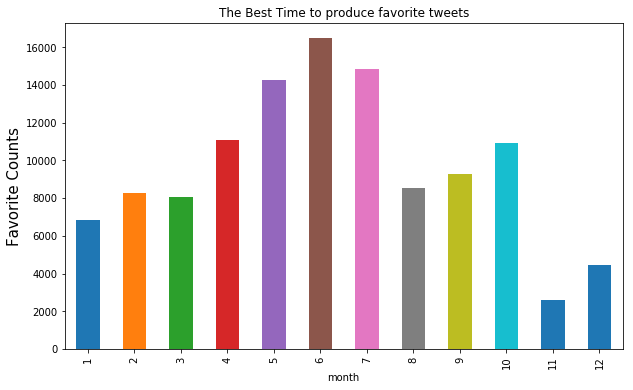

In [166]:
df_favorite['favorite_count'].plot(kind = "bar",figsize = (10,6))
plt.ylabel("Favorite Counts",fontsize = 15)
plt.title("The Best Time to produce favorite tweets")

Text(0.5,1,'The Best Time to produce favorite tweets')

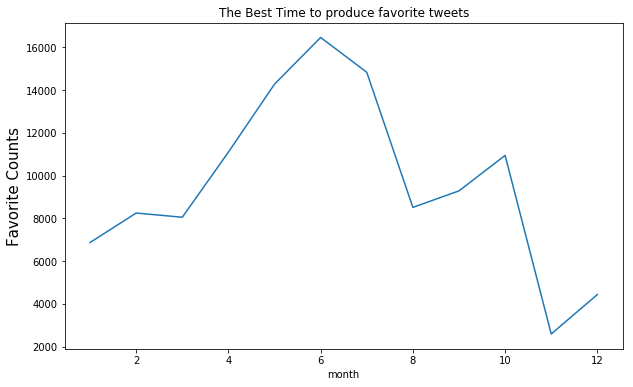

In [168]:
df_favorite['favorite_count'].plot(kind = 'line',figsize = (10,6))
plt.ylabel("Favorite Counts",fontsize = 15)
plt.title("The Best Time to produce favorite tweets")